In [3]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [4]:
env = BlackjackEnv()

In [81]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Lambda discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    # state: Tuple(Player Score(32), Dealer Score(11), Usable ace(2))
    # action: [Stick, Hit]
    
    # Implement this!
    for i_episode in range(num_episodes):
        observation = env.reset()
        
        # Generate an episode using policy:
        observations_list = []
        rewards_list = []
        observations_list.append(observation)
        for t in range(100):
            action = np.argmax(policy(observation))
            observation, reward, done, _ = env.step(action)
            observations_list.append(observation)
            rewards_list.append(reward)
            if done:
                break
                
        visited_states = set()
        for start_t, observation in enumerate(observations_list):
            if observation not in visited_states:   # consider only first-visit state
                # Add current state as a new key 
                # in returns_sum and returns_count if none:
                if observation not in returns_sum:
                    returns_sum[observation] = 0
                if observation not in returns_count:
                    returns_count[observation] = 0
                    
                state_return = 0
                for t, t_reward in enumerate(rewards_list[start_t:]):
                    state_return += (discount_factor ** t) * t_reward
                returns_sum[observation] += state_return
                returns_count[observation] += 1
                
                visited_states.add(observation)
            
    for state in returns_sum:
        V[state] = returns_sum[state] / returns_count[state]

    return V

In [82]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return np.array([1.0, 0.0]) if score >= 20 else np.array([0.0, 1.0])

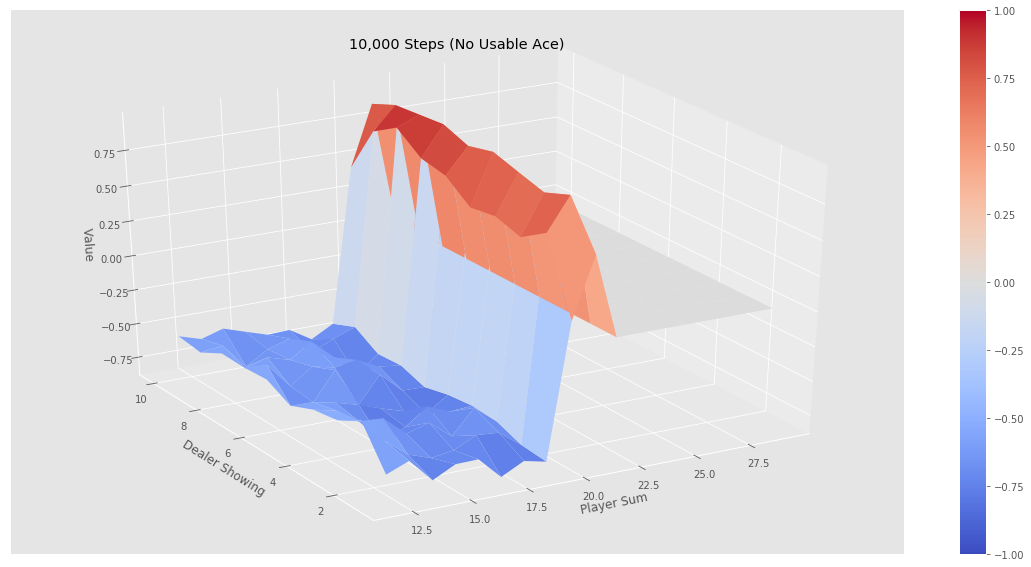

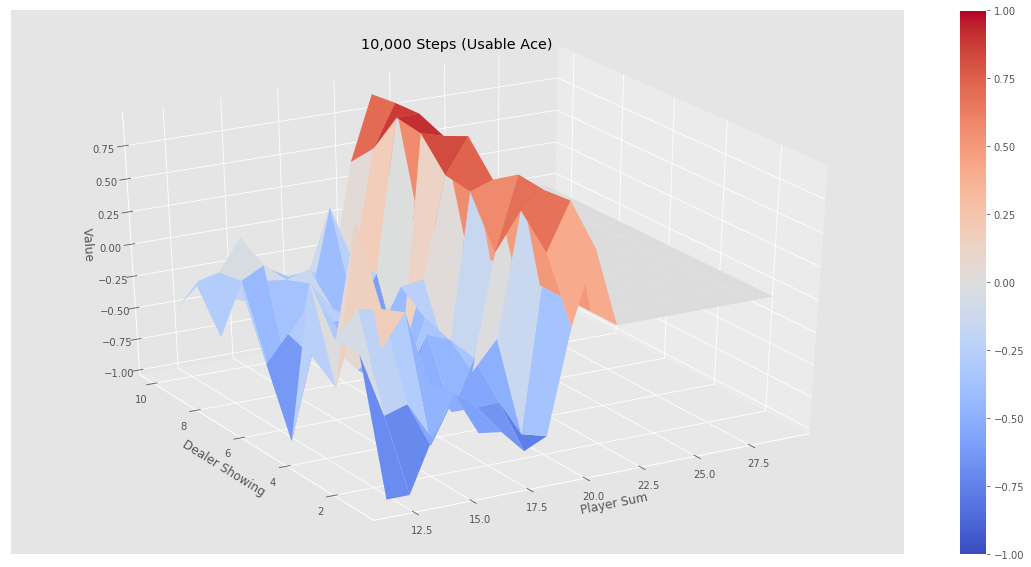

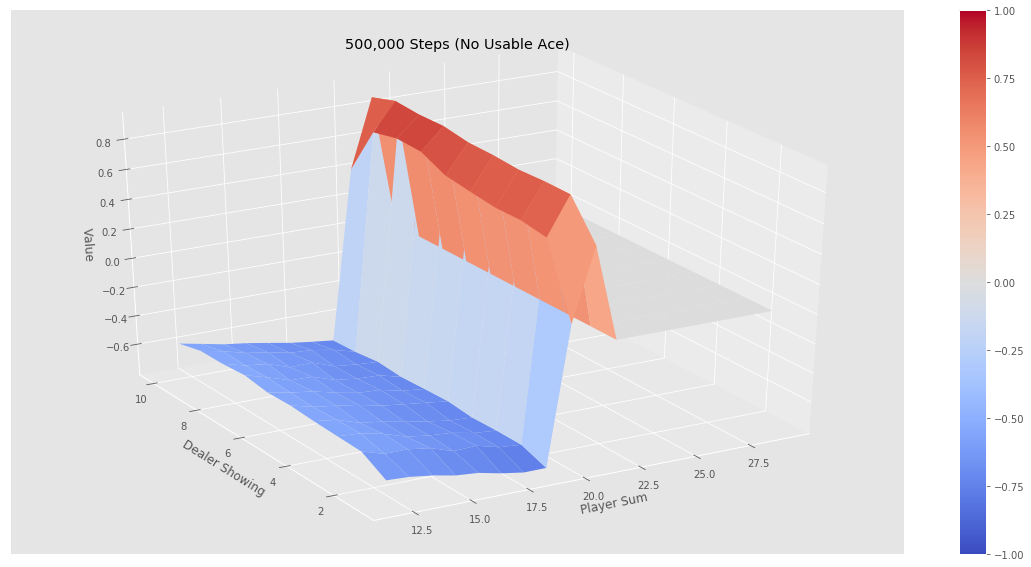

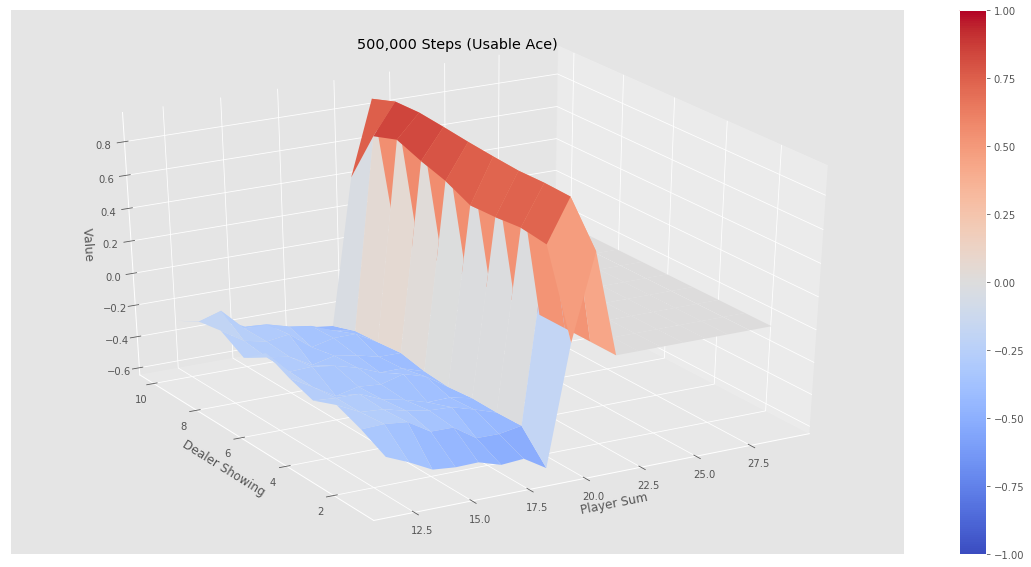

In [83]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")